## Gerekli kütüphaneler:
Daha önce eğitilmiş olan modelin değerlendirilmesi için gerekli kütüphaneler içe aktarılır. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random

## Konfigürasyonlar ve model yükleme:
İlgili veri seti üzerinde eğitilen ve CNN mimarisine ait olan model yüklenir.

In [2]:
image_size = (256, 256)
batch_size = 16
data_directory = "../../data/uc_merced"

model = load_model("../../models/cnn/model_uc_merced.keras")

## Test verisi (doğrulama altkümesi):
`ImageDataGenerator` kullanılarak doğrulama verisi hazırlanmıştır.

In [3]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

val_gen = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

class_labels = list(val_gen.class_indices.keys())

Found 315 images belonging to 21 classes.


## Tahminlerin alınması:
Model doğrulama verisi üzerinde tahmin yapar.

In [4]:
# Gerçek ve tahmin edilen etiketler
y_true = val_gen.classes
y_pred_probs = model.predict(val_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

c:\Users\mehmet\Desktop\LandCoverClassifier\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 538ms/step


## Karışıklık matrisi ve sınıflandırma raporu:
Modelin doğrulama verisindeki tahmin başarımı karışıklık matrisi ve sınıflandırma raporu şekilde değerlendirilmiştir

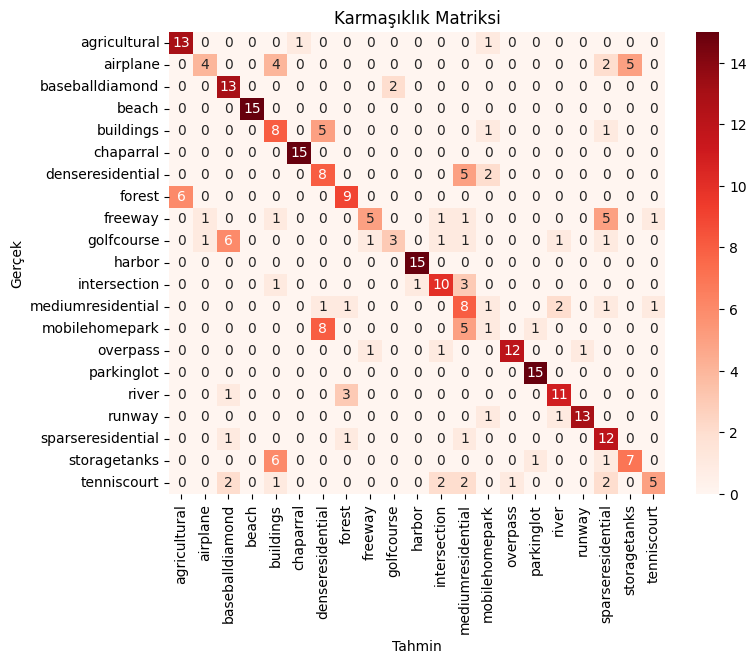

Sınıflandırma Raporu:
                   precision    recall  f1-score   support

     agricultural       0.68      0.87      0.76        15
         airplane       0.67      0.27      0.38        15
  baseballdiamond       0.57      0.87      0.68        15
            beach       1.00      1.00      1.00        15
        buildings       0.38      0.53      0.44        15
        chaparral       0.94      1.00      0.97        15
 denseresidential       0.36      0.53      0.43        15
           forest       0.64      0.60      0.62        15
          freeway       0.71      0.33      0.45        15
       golfcourse       0.60      0.20      0.30        15
           harbor       0.94      1.00      0.97        15
     intersection       0.67      0.67      0.67        15
mediumresidential       0.31      0.53      0.39        15
   mobilehomepark       0.14      0.07      0.09        15
         overpass       0.92      0.80      0.86        15
       parkinglot       0.88     

In [5]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Reds")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karmaşıklık Matriksi")
plt.show()

print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred, target_names=class_labels))

## Rastgele örnekler ile tahmin görselleri:
Doğrulama setinden `shuffle=True` parametresiyle elde edilen rastgele 6 örnek görselleştirilmiştir. Değerlendirme metriklerinde sıra önemli olduğundan `shuffle=False` kullanılmıştır; ancak görsel çeşitliliği sağlamak için bu hücrede ayrı bir `ImageDataGenerator` nesnesi ile `shuffle=True` kullanılmıştır.

Found 315 images belonging to 21 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


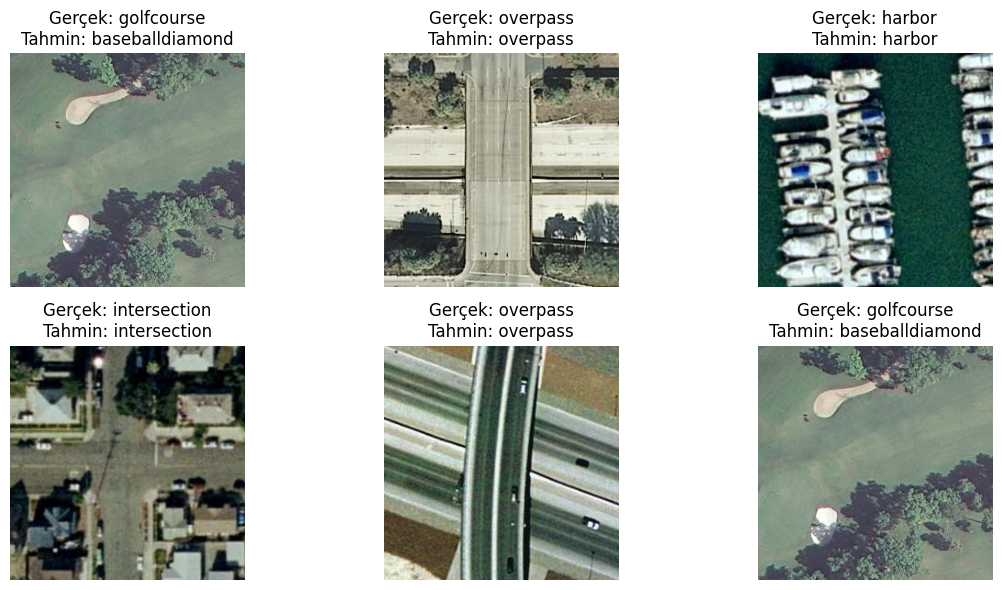

In [6]:
# Görselleştirme için ayrı bir generator
vis_gen = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

val_images, val_labels = next(vis_gen)
preds = model.predict(val_images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(val_labels, axis=1)

plt.figure(figsize=(12, 6))
for i in range(6):
    idx = random.randint(0, len(val_images)-1)
    plt.subplot(2, 3, i+1)
    plt.imshow(val_images[idx])
    plt.title(f"Gerçek: {class_labels[true_classes[idx]]}\nTahmin: {class_labels[pred_classes[idx]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
